# Haiku Generator Notebook

This notebook uses a Markov chain based haiku generator. It reads from a CSV file of haikus (`all_haiku.csv`), builds a Markov chain, and then generates random haikus. Use the interactive button below to generate a new haiku each time!

In [ ]:
import pandas as pd
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import cmudict

nltk.download('punkt')
nltk.download('cmudict')

d = cmudict.dict()

def count_syllables(word):
    """Count syllables in a word using the CMU dictionary"""
    word = word.lower()
    if word not in d:
        return 1 
    return len([ph for ph in d[word][0] if ph[-1].isdigit()])

[nltk_data] Downloading package punkt to /Users/joelrosen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/joelrosen/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [ ]:
def build_markov_chain(csv_file):
    """Build a Markov chain from the haiku dataset"""
    df = pd.read_csv(csv_file)
    
    all_lines = []
    for col in ['0', '1', '2']:
        all_lines.extend(df[col].dropna().tolist())
    
    markov_chain = {}
    for line in all_lines:
        words = word_tokenize(line.lower())
        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i + 1]
            if current_word not in markov_chain:
                markov_chain[current_word] = []
            markov_chain[current_word].append(next_word)
    
    return markov_chain

In [9]:
def generate_line(markov_chain, target_syllables):
    """Generate a line with the target number of syllables"""
    current_word = random.choice(list(markov_chain.keys()))
    line = [current_word]
    syllables = count_syllables(current_word)
    
    while syllables < target_syllables:
        if current_word not in markov_chain or not markov_chain[current_word]:
            current_word = random.choice(list(markov_chain.keys()))
            continue
            
        next_word = random.choice(markov_chain[current_word])
        next_syllables = count_syllables(next_word)
        
        if syllables + next_syllables <= target_syllables:
            line.append(next_word)
            syllables += next_syllables
            current_word = next_word
        else:
            break
    
    return ' '.join(line)

In [10]:
def generate_haiku(markov_chain):
    """Generate a complete haiku (5/7/5 syllable structure)"""
    first_line = generate_line(markov_chain, 5)
    second_line = generate_line(markov_chain, 7)
    third_line = generate_line(markov_chain, 5)
    return f"{first_line}\n{second_line}\n{third_line}"

In [ ]:
markov_chain = build_markov_chain('../all_haiku.csv')
print("Markov chain built successfully!")

Markov chain built successfully!


In [ ]:
haiku = generate_haiku(markov_chain)
print(haiku)

Generated Haiku:
culprit perched on some
swoon she knew you can begin
hollywood tower


In [ ]:
#Fancy button for generating haiku, can delete
import ipywidgets as widgets
from IPython.display import display

def on_button_clicked(b):
    haiku = generate_haiku(markov_chain)
    output_area.clear_output()
    with output_area:
        print("Generated Haiku:")
        print(haiku)

button = widgets.Button(description="Generate Haiku")
button.on_click(on_button_clicked)
output_area = widgets.Output()

display(button, output_area)

Button(description='Generate Haiku', style=ButtonStyle())

Output()

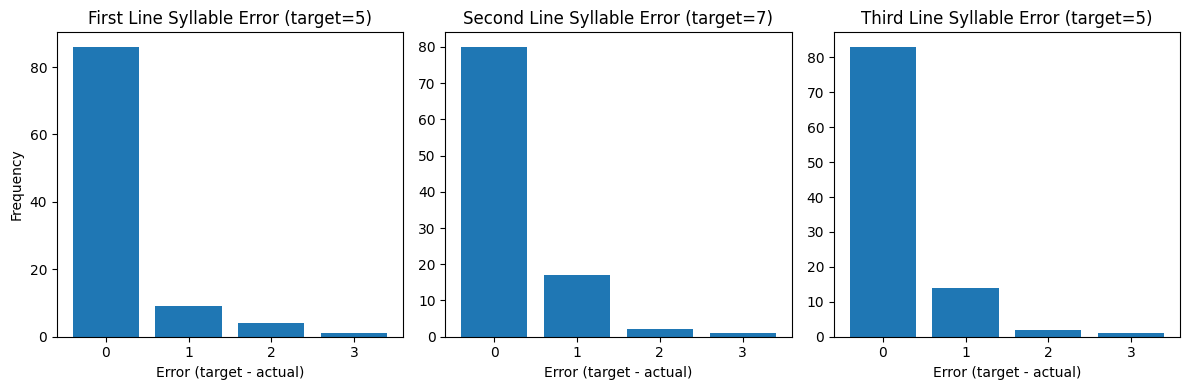

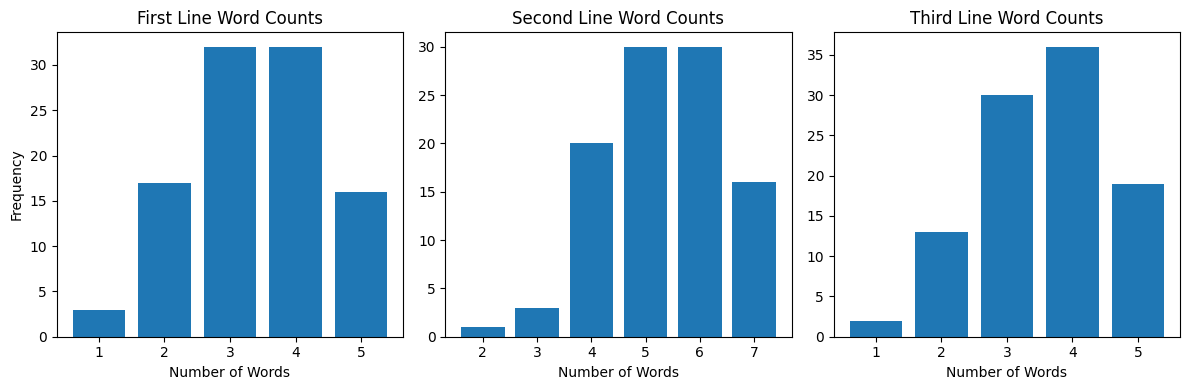

In [ ]:
import matplotlib.pyplot as plt

def analyze_generated_haikus(markov_chain, num_samples=100):
    errors_first = []
    errors_second = []
    errors_third = []
    word_counts_first = []
    word_counts_second = []
    word_counts_third = []
    sample_haikus = []

    for _ in range(num_samples):
        haiku = generate_haiku(markov_chain)
        sample_haikus.append(haiku)
        lines = haiku.split('\n')
        
        syllable_counts = []
        for line in lines:
            words = line.split()
            syllable_count = sum(count_syllables(word) for word in words)
            syllable_counts.append(syllable_count)
            
        errors_first.append(5 - syllable_counts[0])
        errors_second.append(7 - syllable_counts[1])
        errors_third.append(5 - syllable_counts[2])
        
        word_counts_first.append(len(lines[0].split()))
        word_counts_second.append(len(lines[1].split()))
        word_counts_third.append(len(lines[2].split()))
    
    return errors_first, errors_second, errors_third, word_counts_first, word_counts_second, word_counts_third, sample_haikus

errors_first, errors_second, errors_third, wc_first, wc_second, wc_third, sample_haikus = analyze_generated_haikus(markov_chain, num_samples=100)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(errors_first, bins=range(min(errors_first), max(errors_first)+2), align='left', rwidth=0.8)
plt.title("First Line Syllable Error (target=5)")
plt.xlabel("Error (target - actual)")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(errors_second, bins=range(min(errors_second), max(errors_second)+2), align='left', rwidth=0.8)
plt.title("Second Line Syllable Error (target=7)")
plt.xlabel("Error (target - actual)")

plt.subplot(1, 3, 3)
plt.hist(errors_third, bins=range(min(errors_third), max(errors_third)+2), align='left', rwidth=0.8)
plt.title("Third Line Syllable Error (target=5)")
plt.xlabel("Error (target - actual)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(wc_first, bins=range(min(wc_first), max(wc_first)+2), align='left', rwidth=0.8)
plt.title("First Line Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(wc_second, bins=range(min(wc_second), max(wc_second)+2), align='left', rwidth=0.8)
plt.title("Second Line Word Counts")
plt.xlabel("Number of Words")

plt.subplot(1, 3, 3)
plt.hist(wc_third, bins=range(min(wc_third), max(wc_third)+2), align='left', rwidth=0.8)
plt.title("Third Line Word Counts")
plt.xlabel("Number of Words")

plt.tight_layout()
plt.show()